# MODELOS ML

In [30]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.datasets as skds
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, root_mean_squared_error, roc_auc_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost

## Importar dataset

In [15]:
df_pred_sol = pd.read_csv("DATASETS/pred_solar.csv", index_col=0)

In [16]:
df_pred_sol

,indicativo,p_max,n_cub,glo,hr,n_gra,n_fog,inso,q_max,nw_55,...,nv_0100,ts_50,q_min,np_010,fecha,Año,Mes,geo_id,Comunidad,Energía Solar
0,1387,32.6(19),11.0,28536.0,75.0,1.0,5.0,4.7,1021.4(03),13.0,...,0.0,19.5,977.3(19),19.0,2023-10,2023,10,17,Galicia,1340.93
1,1387,36.4(05),12.0,16599.0,80.0,0.0,3.0,3.0,1024.7(22),12.0,...,0.0,15.5,983.0(04),18.0,2023-11,2023,11,17,Galicia,802.39
2,1387,56.8(27),8.0,14628.0,77.0,0.0,0.0,3.0,1032.2(20),13.0,...,0.0,13.1,992.5(01),18.0,2023-12,2023,12,17,Galicia,777.35
10,1387,4.2(28),3.0,75042.0,74.0,0.0,2.0,9.3,1016.4(09),2.0,...,0.0,22.2,1002.9(07),10.0,2023-7,2023,7,17,Galicia,2804.43
11,1387,3.8(26),5.0,68298.0,75.0,0.0,2.0,9.4,1020.1(04),1.0,...,0.0,22.7,1002.2(18),9.0,2023-8,2023,8,17,Galicia,2588.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,9434,8.6(07),8.0,NaN,74.0,0.0,2.0,6.4,1003.9(05),0.0,...,0.0,NaN,981.7(15),4.0,2025-2,2025,2,5,Aragón,265083.05
1396,9434,15.4(03),17.0,NaN,71.0,0.0,1.0,4.9,994.7(02),9.0,...,0.0,NaN,966.4(13),9.0,2025-3,2025,3,5,Aragón,258415.29
1397,9434,13.6(25),5.0,NaN,63.0,0.0,0.0,9.1,993.4(23),6.0,...,0.0,NaN,971.1(15),9.0,2025-4,2025,4,5,Aragón,368751.20
1398,9434,9.4(14),3.0,NaN,51.0,0.0,0.0,10.9,994.7(28),13.0,...,0.0,NaN,977.2(04),10.0,2025-5,2025,5,5,Aragón,417250.13


In [17]:
df_pred_sol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 864 entries, 0 to 1399
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   indicativo     864 non-null    object 
 1   p_max          845 non-null    object 
 2   n_cub          684 non-null    float64
 3   glo            723 non-null    float64
 4   hr             814 non-null    float64
 5   n_gra          651 non-null    float64
 6   n_fog          651 non-null    float64
 7   inso           651 non-null    float64
 8   q_max          751 non-null    object 
 9   nw_55          796 non-null    float64
 10  q_mar          752 non-null    float64
 11  q_med          752 non-null    float64
 12  tm_min         823 non-null    float64
 13  ta_max         823 non-null    object 
 14  ts_min         823 non-null    float64
 15  nt_30          823 non-null    float64
 16  nv_0050        609 non-null    float64
 17  n_des          684 non-null    float64
 18  w_racha       

In [13]:
df_pred_sol.describe()

,n_cub,glo,hr,n_gra,n_fog,inso,nw_55,q_mar,q_med,tm_min,...,n_nie,tm_mes,tm_max,nv_0100,ts_50,np_010,Año,Mes,geo_id,Energía Solar
count,684.000000,723.000000,814.000000,651.000000,651.000000,651.000000,796.000000,752.000000,752.000000,823.000000,...,651.000000,823.000000,823.000000,609.000000,71.000000,845.000000,864.000000,864.000000,864.000000,8.640000e+02
mean,6.595029,51755.937759,64.514742,0.274962,2.698925,7.728725,3.238693,1016.961303,966.735771,11.807655,...,0.325653,17.031592,22.209113,0.045977,18.449296,5.663905,2024.000000,6.500000,10.138889,3.593055e+05
std,5.015762,23018.846521,14.352500,0.632190,4.174094,2.802222,4.054759,4.247287,58.494285,6.285944,...,1.509438,6.530304,7.239085,0.271184,6.868102,4.775350,0.707516,3.454052,5.471016,4.083526e+05
min,0.000000,12835.000000,16.000000,0.000000,0.000000,2.100000,0.000000,1008.400000,765.000000,-2.000000,...,0.000000,0.200000,2.400000,0.000000,7.700000,0.000000,2023.000000,1.000000,4.000000,2.247000e+01
25%,2.000000,30216.500000,56.000000,0.000000,0.000000,5.400000,0.000000,1013.900000,939.150000,7.200000,...,0.000000,12.300000,16.900000,0.000000,12.900000,2.000000,2023.750000,3.750000,5.750000,2.530085e+04
50%,6.000000,50440.000000,67.000000,0.000000,1.000000,7.400000,2.000000,1015.800000,985.600000,11.700000,...,0.000000,16.700000,21.800000,0.000000,18.100000,4.000000,2024.000000,6.500000,8.000000,1.734999e+05
75%,10.000000,74339.000000,76.000000,0.000000,4.000000,10.000000,4.000000,1020.200000,1010.900000,16.600000,...,0.000000,21.900000,27.350000,0.000000,22.950000,9.000000,2024.250000,9.250000,15.250000,6.059836e+05
max,25.000000,99977.000000,93.000000,4.000000,26.000000,13.600000,23.000000,1030.200000,1024.900000,25.400000,...,19.000000,30.700000,40.100000,3.000000,31.900000,20.000000,2025.000000,12.000000,21.000000,1.517930e+06


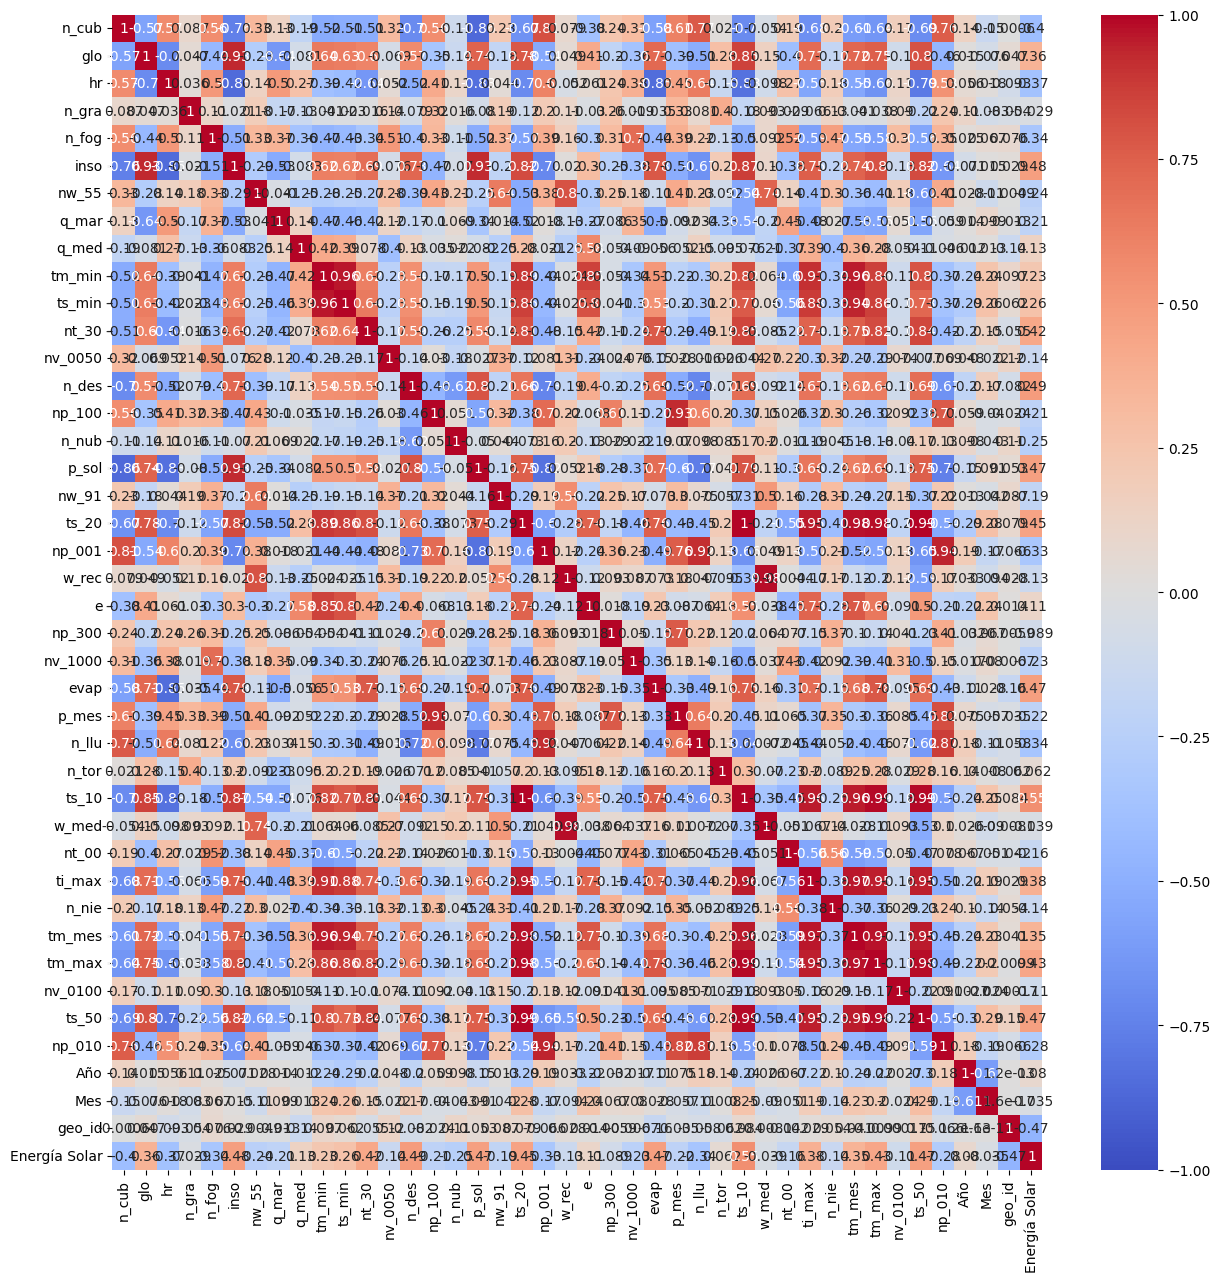

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(df_pred_sol.corr(numeric_only=True), annot=True, cmap="coolwarm", vmin=-1);

In [28]:
df_pred = df_pred_sol.dropna()

In [29]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 0 to 1359
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   indicativo     43 non-null     object 
 1   p_max          43 non-null     object 
 2   n_cub          43 non-null     float64
 3   glo            43 non-null     float64
 4   hr             43 non-null     float64
 5   n_gra          43 non-null     float64
 6   n_fog          43 non-null     float64
 7   inso           43 non-null     float64
 8   q_max          43 non-null     object 
 9   nw_55          43 non-null     float64
 10  q_mar          43 non-null     float64
 11  q_med          43 non-null     float64
 12  tm_min         43 non-null     float64
 13  ta_max         43 non-null     object 
 14  ts_min         43 non-null     float64
 15  nt_30          43 non-null     float64
 16  nv_0050        43 non-null     float64
 17  n_des          43 non-null     float64
 18  w_racha        

In [32]:
X = df_pred_sol[["glo","hr","inso","q_med","p_mes","p_sol","tm_mes"]]
y = df_pred_sol["Energía Solar"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)



In [35]:
xgb_reg = xgboost.XGBRegressor(random_state=42)

xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("r2_score:", r2_score(y_test, y_pred))

print("______________________________________________")

MAE: 125512.7500427387
MAPE: 48.95194125289253
MSE: 43772542363.31352
RMSE: 209218.88624909922
r2_score: 0.6858646917936166
______________________________________________


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)

print("MAE:", mean_absolute_error(y_test, predictions))
print("MAPE:", mean_absolute_percentage_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("r2_score train", lin_reg.score(X_train, y_train))
print("r2_score test",lin_reg.score(X_test, y_test))

print("______________________________________________")

In [ ]:
poly_feats = PolynomialFeatures(degree = 2)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)
X_poly

X_train, X_test, y_train, y_test = train_test_split(X_poly,y_train, test_size = 0.2, random_state=42)